<a href="https://colab.research.google.com/github/robitussin/CCADMACL_EXERCISES/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Use all feature selection methods to find the best features

## Dataset Information

## Features

Number of Instances: 20640

Number of Attributes: 8 numeric, predictive attributes and the target

Attribute Information:

MedInc - median income in block group

HouseAge - median house age in block group

AveRooms - average number of rooms per household

AveBedrms - average number of bedrooms per household

Population - block group population

AveOccup - average number of household members

Latitude - block group latitude

Longitude - block group longitude

## Target
The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

In [78]:
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

In [79]:
housing = fetch_california_housing(as_frame=True)
df = pd.concat([housing.data, housing.target], axis=1)
df_target = pd.DataFrame(df.MedHouseVal, columns=['MedHouseVal'])

In [118]:
df_target

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


1. Use any filter method to select the best features

Variance Threshold

In [81]:
# put your answer here
selector = VarianceThreshold(threshold=0.5) 
sel = selector.fit(df)
sel_index = sel.get_support()
median_house_vt = df.iloc[:, sel_index]

In [82]:
median_house_vt

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32,0.847


Mutual_info_classif

In [85]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Calculate mutual information scores between features and target
feature_scores = mutual_info_regression(df.drop(columns=['MedHouseVal']), df['MedHouseVal'], random_state=0)

# Create a DataFrame to pair features with their scores
feature_score_df = pd.DataFrame({
    'Feature': df.drop(columns=['MedHouseVal']).columns,
    'Score': feature_scores
})

# Sort features by score in descending order
sorted_features = feature_score_df.sort_values(by='Score', ascending=False)

# Get the top "threshold" features
threshold = 5
top_features = sorted_features.head(threshold)

# Return a list of top features
top_feature_list_mi = top_features['Feature'].tolist()

# Print top feature list
print(top_feature_list_mi)


['Longitude', 'MedInc', 'Latitude', 'AveRooms', 'AveOccup']


F_classif

In [89]:
from sklearn.feature_selection import f_classif

threshold = 5 # the number of most relevant features
high_score_features_fc = []
feature_scores = f_classif(df, df_target.values.ravel())[0]

In [90]:
# put your answer here
for score, f_name in sorted(zip(feature_scores, df.columns), reverse=True)[:threshold]:
      # print(f_name, score)
      high_score_features_fc.append(f_name)

df_wine_fc = df[high_score_features_fc]
df_wine_fc.columns

Index(['MedInc', 'Latitude', 'Population', 'HouseAge', 'Longitude'], dtype='object')

SelectKBest

In [93]:
from sklearn.feature_selection import SelectKBest, chi2

# Shift features to ensure all values are non-negative
df_shifted = df - df.min().min() + 1e-5

# Discretize the target into classes (e.g., 5 bins)
df_target_shifted = pd.qcut(df_target['MedHouseVal'], q=5, labels=False)

# Use SelectKBest with chi2
threshold = 5  # Number of features to select
skb = SelectKBest(score_func=chi2, k=threshold)
sel_skb = skb.fit(df_shifted, df_target_shifted)

# Get selected feature indices and create new DataFrame
sel_skb_index = sel_skb.get_support()
df_selected_features_skb = df.iloc[:, sel_skb_index]

print("Selected Features:\n", df.columns[sel_skb_index])

Selected Features:
 Index(['MedInc', 'HouseAge', 'Population', 'Longitude', 'MedHouseVal'], dtype='object')


Pearson's Correlation

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
corr_with_label = 0.05  #correlation threshold for target
corr_between_features = 0.65 #correlation threshold between features

df_wine_combined = pd.concat([df, df_target], axis=1)

In [68]:
cor = df_wine_combined.corr()

# drop less correlated ones with target
corr_target = abs(cor['MedHouseVal'])
relevant_features = corr_target[corr_target > corr_with_label]
df_wine_corr = df_wine_combined[list(relevant_features.index)]

df_wine_corr.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal', 'MedHouseVal', 'MedHouseVal',
       'MedHouseVal'],
      dtype='object')

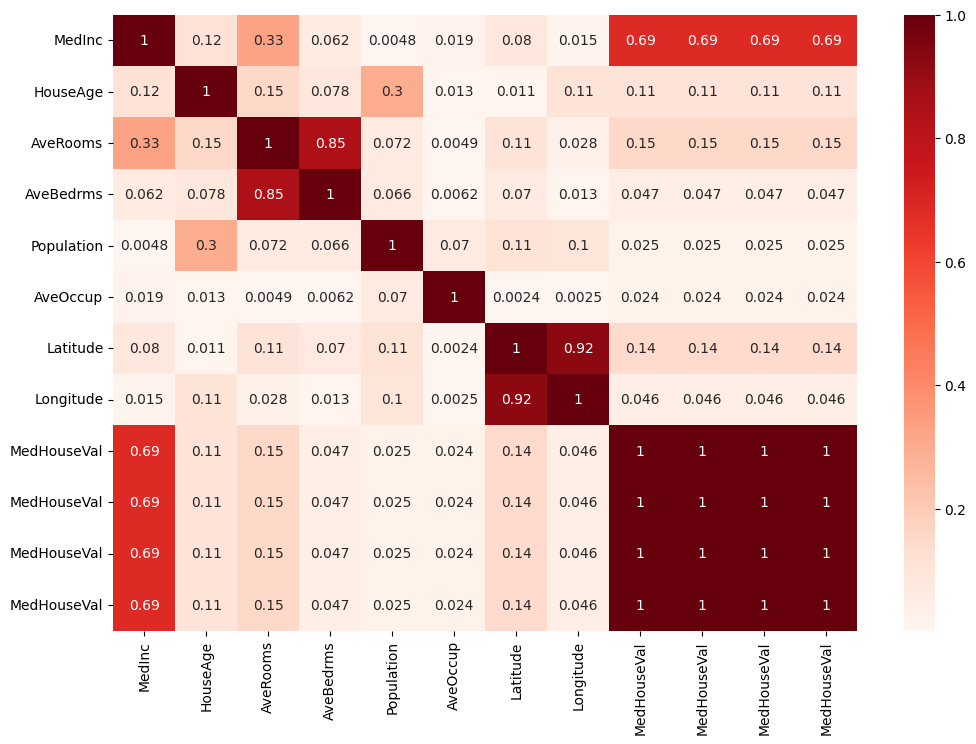

('df_wine_corr',
 Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude'], dtype='object'))

In [69]:

cor = df_wine_corr.corr().abs()
plt.figure(figsize=(12, 8))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# drop highly correlated features
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > corr_between_features)]
df_wine_corr = df_wine_corr.drop(df_wine_corr[to_drop], axis=1)
df_wine_corr = df_wine_corr[[cols for cols in df_wine_corr.columns if cols != 'quality']]
'df_wine_corr', df_wine_corr.columns

2. Use any wrapper method to select the best features

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

threshold = 5 # the number of most relevant features
model_rf = RandomForestClassifier(n_estimators=500, random_state=0, max_depth = 3)
selector = RFE(model_rf, n_features_to_select=5, step=1)

df_target_cut = pd.qcut(df_target['MedHouseVal'], q=5, labels=False)

selector = selector.fit(df, df_target_cut.values.ravel())
selector_ind = selector.get_support()
df_wine_rfe = df.iloc[:, selector_ind]
df_wine_rfe.columns

Index(['MedInc', 'AveRooms', 'AveOccup', 'Latitude', 'MedHouseVal'], dtype='object')

3. Use any embedded methood to select the best features

In [74]:
# put your answer here
from sklearn.feature_selection import SelectFromModel

df_target_cut = pd.qcut(df_target['MedHouseVal'], q=5, labels=False)

model_rf = RandomForestClassifier(n_estimators=500, random_state=0, max_depth = 3)
model_rf.fit(df, df_target_cut.values.ravel())

sel_sfm = SelectFromModel(model_rf, prefit=True)
sel_sfm_index = sel_sfm.get_support()
df_wine_sfm = df.iloc[:, sel_sfm_index]
df_wine_sfm.columns

Index(['MedInc', 'MedHouseVal'], dtype='object')

Training

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def train_random_forest_regressor(df, target, test_size=0.2, random_state=42):
    """
    Train a Random Forest regression model.

    Parameters:
        df (pd.DataFrame): DataFrame containing feature columns.
        target (pd.Series): Dependent variable (target column).
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Random state for reproducibility.

    Returns:
        model (RandomForestRegressor): Trained Random Forest model.
        metrics (dict): A dictionary containing model performance metrics (R², RMSE).
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=test_size, random_state=random_state)
    
    # Initialize the Random Forest regressor
    model = RandomForestRegressor(random_state=random_state)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Store metrics in a dictionary
    metrics = {
        'R² Score': r2,
        'RMSE': rmse
    }
    
    return model, metrics

In [119]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Train the model
model_vt, metrics_vt = train_random_forest_regressor(median_house_vt, df_target) # Variance Threshold
model_mi, metrics_mi = train_random_forest_regressor(df[top_feature_list_mi], df_target) # Mutual regression
model_fc, metrics_fc = train_random_forest_regressor(df[high_score_features_fc], df_target) # F Classification
model_skb, metrics_skb = train_random_forest_regressor(df_selected_features_skb, df_target) # Select K Best
model_p, metrics_p = train_random_forest_regressor(df_wine_corr, df_target) # Pearsons
model_rfe, metrics_rfe = train_random_forest_regressor(df_wine_rfe, df_target) # Wrapper
model_sfm, metrics_sfm = train_random_forest_regressor(df_wine_sfm, df_target) # Rfe
model_c, model_c = train_random_forest_regressor(df, df_target) # Complete

C:\Users\ron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

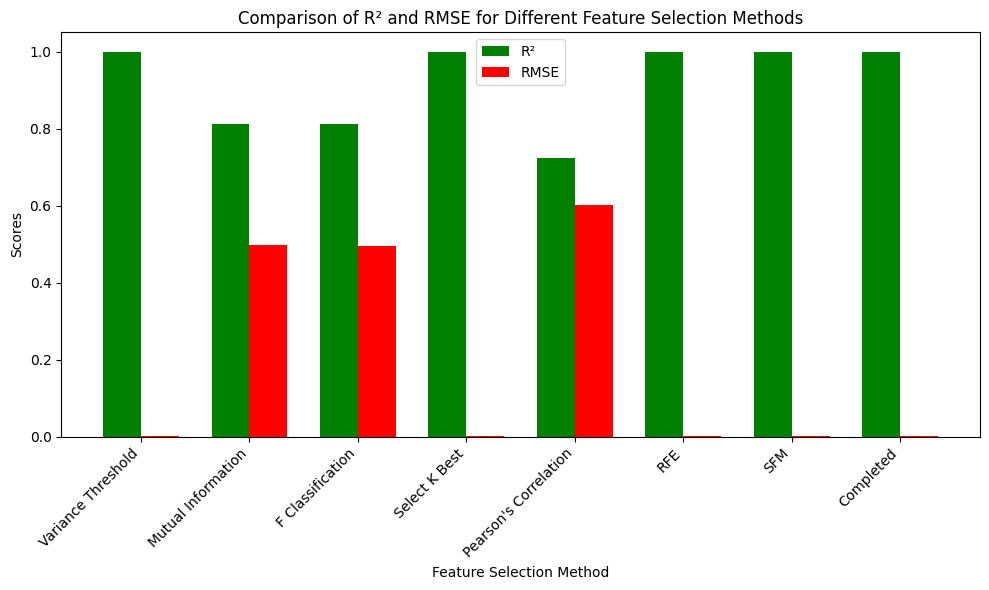

In [120]:
import matplotlib.pyplot as plt

# Assuming the metrics_vt, metrics_mi, etc. contain R^2 and RMSE values in this format:
# metrics_vt = {'r2': r2_value, 'rmse': rmse_value}
# Extract the R² and RMSE values for each model
metrics = {
    'Variance Threshold': metrics_vt,
    'Mutual Information': metrics_mi,
    'F Classification': metrics_fc,
    'Select K Best': metrics_skb,
    'Pearson\'s Correlation': metrics_p,
    'RFE': metrics_rfe,
    'SFM': metrics_sfm,
    'Completed': model_c
}

# Extract R² and RMSE for each method
r2_scores = [metrics[method]['R² Score'] for method in metrics]
rmse_scores = [metrics[method]['RMSE'] for method in metrics]

# Set up the positions for the bar graph
methods = list(metrics.keys())
x_pos = range(len(methods))

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Position of bars
r2_bars = [x - bar_width/2 for x in x_pos]
rmse_bars = [x + bar_width/2 for x in x_pos]

# Plotting the R² and RMSE bars
ax.bar(r2_bars, r2_scores, bar_width, label='R²', color='g')
ax.bar(rmse_bars, rmse_scores, bar_width, label='RMSE', color='r')

# Labels and title
ax.set_xlabel('Feature Selection Method')
ax.set_ylabel('Scores')
ax.set_title('Comparison of R² and RMSE for Different Feature Selection Methods')
ax.set_xticks(x_pos)
ax.set_xticklabels(methods, rotation=45, ha="right")
ax.legend()

# Show the plots
plt.tight_layout()
plt.show()
